Added solution for Case-3: Laplace Equation with Custom Boundary Conditions

Solved the Laplace equation using finite difference method with Jacobi iteration.
Applied the given boundary conditions to the grid.
Visualized temperature distribution over time.

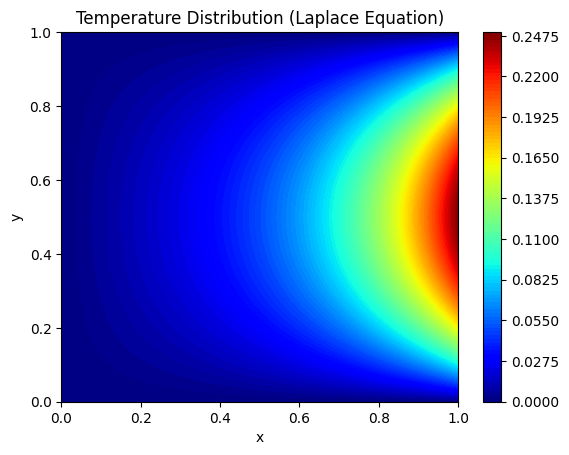

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size and number of points
nx = 100
ny = 100
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

# Initialize the temperature field (zero initially)
T = np.zeros_like(X)

# Apply boundary conditions
T[:, 0] = 0  # T(x, 0) = 0
T[:, -1] = y * (1 - y)  # T(1, y) = y(1 - y)
T[0, :] = 0  # T(0, y) = 0
T[-1, :] = 0  # T(x, 1) = 0

# Finite difference method (Jacobi iteration)
# Set tolerance for convergence and max iterations
tolerance = 1e-6
max_iter = 10000
iter_count = 0
error = 1

# Iterate until convergence
while error > tolerance and iter_count < max_iter:
    T_old = T.copy()
    
    # Update the temperature field using the finite difference method
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T[i, j] = 0.25 * (T_old[i+1, j] + T_old[i-1, j] + T_old[i, j+1] + T_old[i, j-1])
    
    # Calculate the error (difference between old and new temperature field)
    error = np.max(np.abs(T - T_old))
    iter_count += 1

# Plot the temperature field using a contour plot
plt.contourf(X, Y, T, cmap='jet', levels=100)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Temperature Distribution (Laplace Equation)')
plt.show()
